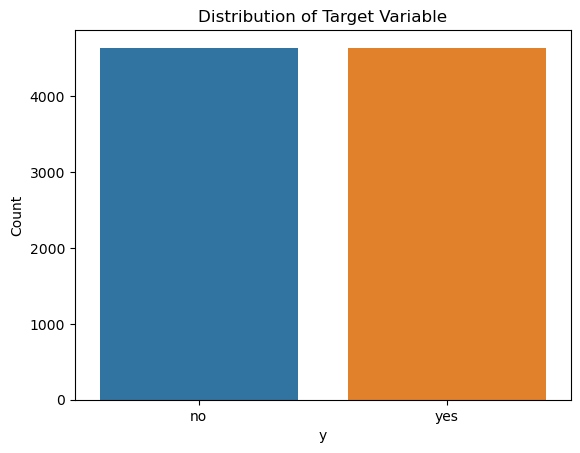

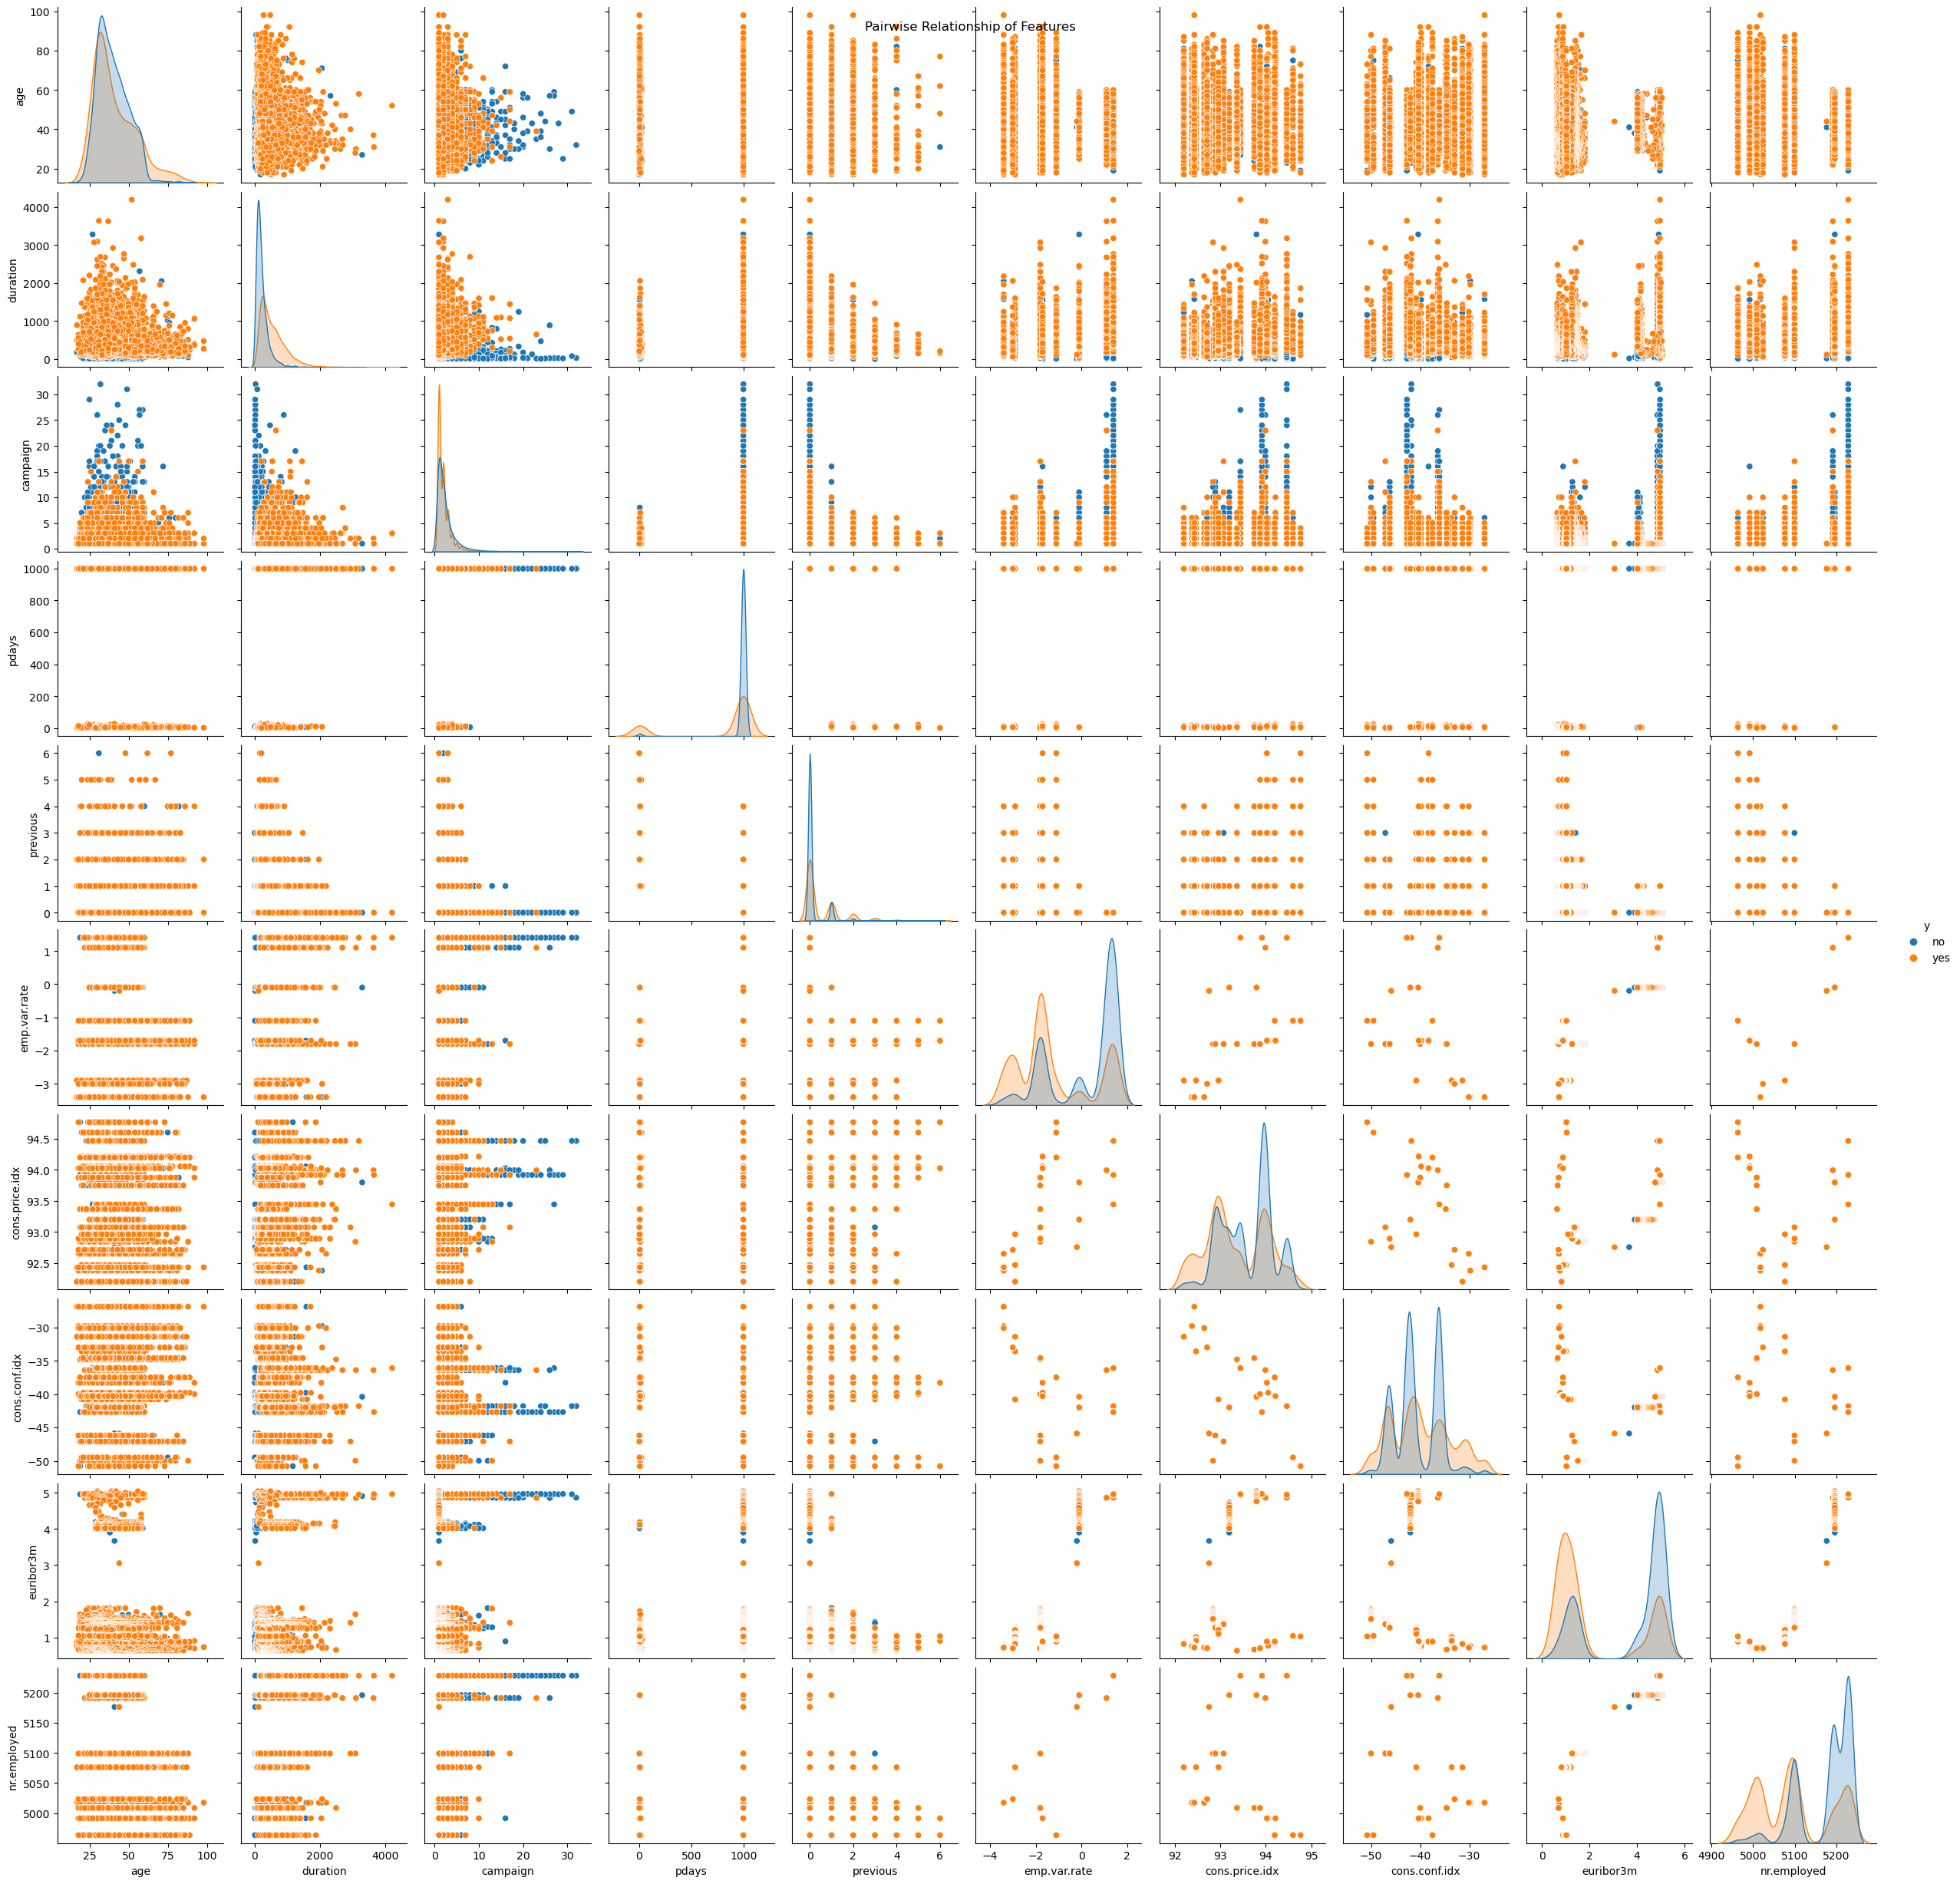

Logistic Regression:
              precision    recall  f1-score   support

           0       0.85      0.86      0.86      1397
           1       0.85      0.85      0.85      1387

    accuracy                           0.85      2784
   macro avg       0.85      0.85      0.85      2784
weighted avg       0.85      0.85      0.85      2784

Decision Tree:
              precision    recall  f1-score   support

           0       0.83      0.85      0.84      1397
           1       0.85      0.82      0.83      1387

    accuracy                           0.84      2784
   macro avg       0.84      0.84      0.84      2784
weighted avg       0.84      0.84      0.84      2784

Support Vector Machines (SVM):
              precision    recall  f1-score   support

           0       0.87      0.85      0.86      1397
           1       0.85      0.87      0.86      1387

    accuracy                           0.86      2784
   macro avg       0.86      0.86      0.86      2784
weighte

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

data = pd.read_csv("bank-additional-full.csv", sep=";")

data.dropna(inplace=True)

undersampler = RandomUnderSampler(random_state=42)
X_resampled, y_resampled

cat_cols = data.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in cat_cols:
    data[col] = le.fit_transform(data[col])

X = data.drop("y", axis=1)
y = data["y"]

X.replace([np.inf, -np.inf], np.nan, inplace=True)
X.fillna(X.mean(), inplace=True)

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

selector = SelectKBest(score_func=chi2, k=10)
X_selected = selector.fit_transform(X_scaled, y)

selected_feature_indices = selector.get_support(indices=True)

selected_features = X_scaled.columns[selected_feature_indices]
X_selected = pd.DataFrame(X_selected, columns=selected_features)
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

print("Logistic Regression:")
print(classification_report(y_test, y_pred_logreg))

print("Decision Tree:")
print(classification_report(y_test, y_pred_dt))

print("Support Vector Machines (SVM):")
print(classification_report(y_test, y_pred_svm))
